In [1]:
# Predict House Prices using Knowledge Discovery Process

# Step1 - Data Collection
# Step2 - Data Pre-Processing
# Step3 - Data Transformation
# Step4 - Data Mining
# Step5 - Interpretation and Evaluation

In [2]:
import pandas as pd

df = pd.read_csv('D:\Public\Jyothsna\Python\Hackveda\Housing_Modified.csv')
df.head(3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no


In [3]:
# Calculate the correlation among variables

df.corr()

,price,lotsize,bedrooms,bathrms,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.178178
garagepl,0.383302,0.352872,0.139117,0.178178,1.000000


In [4]:
# Data Preprocessing using Label Binarizer and One Hot Encoder

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

df.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0


In [5]:
# One Hot Encoder
# Change the stories = Multicategory variable into numbers

df1 = pd.get_dummies(df.stories,prefix='stories')

# Concatenate df1 with df ([df,df1]) column wise (axis=1)

df = pd.concat([df,df1], axis=1)

In [6]:
df.head(3)

del[df['stories']]

In [7]:
df.head(3)

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,0,1,0,0


In [8]:
df.corr()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074,0.372281,-0.270058,0.138254,-0.002089
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782,0.178354,0.054348,0.020567,-0.159612
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953,0.145525,-0.509974,0.099150,0.377424
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013,0.281003,-0.250784,0.036027,0.080982
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378,0.115453,-0.053249,0.073533,-0.047074
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292,0.067567,-0.022632,-0.038733,0.006938
fullbase,0.186218,0.047487,0.097201,0.102791,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651,-0.165285,0.059154,-0.132540,0.098694
gashw,0.092837,-0.009201,0.046028,0.067365,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170,-0.062416,-0.060336,0.072922,0.054823
airco,0.453347,0.221765,0.160412,0.184955,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626,0.298887,-0.143174,0.110682,-0.074706
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364,0.126112,0.016610,-0.079170,-0.041931


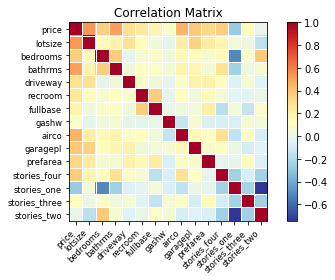

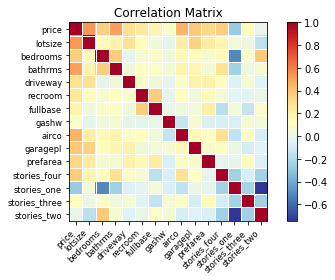

In [9]:
# Create a Correlation matrix

import statsmodels.api as sm
%matplotlib inline
sm.graphics.plot_corr(df.corr(),xnames=list(df.columns))

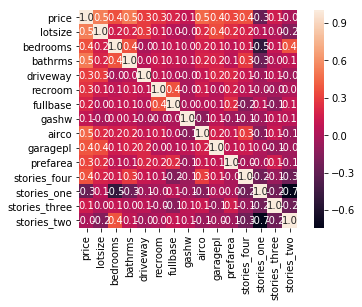

In [10]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

import seaborn as sns
sns.heatmap(df.corr(),square=True,annot=True,fmt='.1f')

In [11]:
df.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_four',
       'stories_one', 'stories_three', 'stories_two'],
      dtype='object')

In [12]:
# Create a list of independent variables

independent_variables = ['lotsize','bedrooms',
                         'bathrms','driveway',
                         'recroom','fullbase','gashw',
                         'airco','garagepl','prefarea',
                         'stories_four','stories_one',
                         'stories_three','stories_two']
independent_variables

['lotsize',
 'bedrooms',
 'bathrms',
 'driveway',
 'recroom',
 'fullbase',
 'gashw',
 'airco',
 'garagepl',
 'prefarea',
 'stories_four',
 'stories_one',
 'stories_three',
 'stories_two']

In [13]:
# https://en.wikipedia.org/wiki/Ordinary_least_squares

# sm.OLS(response variable (endog) 1d array, independent variable (exog) 2d array (n X k))
# Y = m1X1 + m2X2 + ...... + mnXn

# Get the Independednt variables

independent = df.columns
independent = independent.delete(0)
X = df[independent]   
print(X)       # X = Indepedent variables / exog variables (2-D)

Y = df['price']
print(Y)    # Y = response variable / Dependent variable / target variable / endog (1-D)


     lotsize  bedrooms  bathrms  driveway  recroom  fullbase  gashw  airco  \
0       5850         3        1         1        0         1      0      0   
1       4000         2        1         1        0         0      0      0   
2       3060         3        1         1        0         0      0      0   
3       6650         3        1         1        1         0      0      0   
4       6360         2        1         1        0         0      0      0   
5       4160         3        1         1        1         1      0      1   
6       3880         3        2         1        0         1      0      0   
7       4160         3        1         1        0         0      0      0   
8       4800         3        1         1        1         1      0      0   
9       5500         3        2         1        1         0      0      1   
10      7200         3        2         1        0         1      0      1   
11      3000         2        1         0        0         0    

In [14]:
model = sm.OLS(Y,X)
model = model.fit()     # Model Fitting = Calculate slope (m1 to m14) and intercept (c) 
                        # using actual values of X and Y

Y_pred = model.predict(X) # we calculated the values of Y using m, X and c 

df['pred_price'] = Y_pred
df[['lotsize','price','pred_price']]

,lotsize,price,pred_price
0,5850,42000.0,65469.387145
1,4000,38500.0,41709.888312
2,3060,49500.0,40641.075980
3,6650,60500.0,62891.326583
4,6360,61000.0,49935.274323
5,4160,66000.0,66999.317077
6,3880,66000.0,77039.215041
7,4160,69000.0,57214.209004
8,4800,83800.0,56769.491374
9,5500,88500.0,104761.319324


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     84.47
Date:                Sun, 21 Apr 2019   Prob (F-statistic):          4.12e-120
Time:                        15:51:46   Log-Likelihood:                -6033.7
No. Observations:                 546   AIC:                         1.210e+04
Df Residuals:                     532   BIC:                         1.216e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.4853      0.357      9.760      0.000       2.784       4.187
bedrooms       2207.4007   1126.826      1.959      0.051      -6.174    4420.976
bathrms        1.423e+04   1501.004      9.479      0.000    1.13e+04    1.72e+04
driveway       6744.5906   2049.077      3.292      0.001    2719.317    1.08e+04
recroom        4452.7280   1905.476      2.337      0.020     709.547    8195.909
fullbase       5611.2079   1602.026      3.503      0.000    2464.134    8758.281
gashw          1.298e+04   3244.074      4.002      0.000    6610.754    1.94e+04
airco          1.246e+04   1568.474      7.944      0.000    9379.277    1.55e+04
garagepl       4207.8472    847.752      4.964      0.000    2542.495    5873.200
prefarea       9339.4245   1695.216      5.509      0.000    6009.286    1.27e+04
stories_four   2.265e+04   5140.674      4.406      0.000    1.25e+04    3.27e+04
stories_one    2381.0771   3517.544      0.677      0.499   -4528.903    9291.057
stories_three  1.512e+04   4848.135      3.119      0.002    5596.507    2.46e+04
stories_two    7666.2541   4153.290      1.846      0.065    -492.606    1.58e+04
==============================================================================
Omnibus:                       98.599   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.624
Skew:                           0.891   Prob(JB):                     1.27e-58
Kurtosis:                       5.923   Cond. No.                     7.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

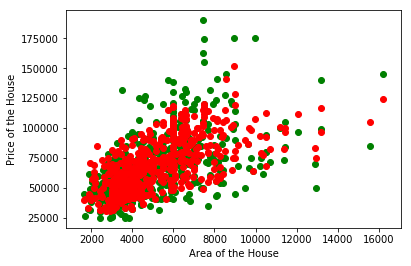

In [15]:
# Draw a plot of actual prices vs predicted prices by learned machine

import matplotlib.pyplot as plt

#plt.plot(df['lotsize'],df['price'],color='green')
plt.scatter(df['lotsize'],df['price'],color='green')
plt.scatter(df['lotsize'],df['pred_price'],color='red')

plt.xlabel('Area of the House')
plt.ylabel('Price of the House')

model.summary()

In [ ]:
# Variance Inflation Factor
# https://en.wikipedia.org/wiki/Variance_inflation_factor

'''
--> Meaning: Influence of independent variables on each other instead of outcome (price)
--> Identify those variables who influence other independent variables, positively or negatively.
    The Prediction of outcome gets affected
'''
